  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non

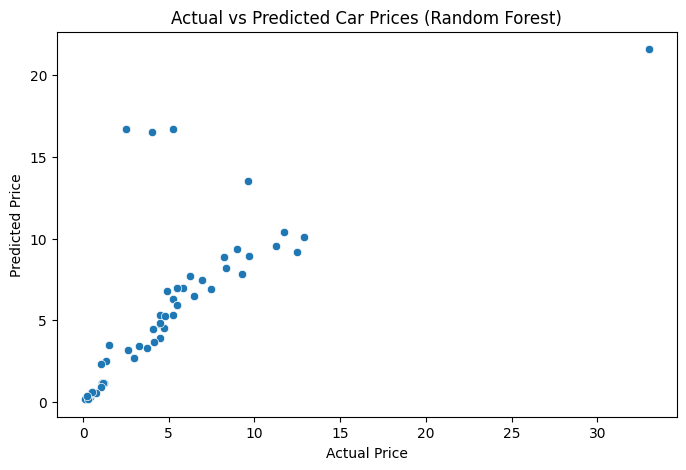


💰 Predicted Selling Price (in lakhs): 5.48


In [1]:
# -----------------------------------------------
# 🚗 CAR PRICE PREDICTION PROJECT - FULL PIPELINE
# -----------------------------------------------

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Step 2: Load Dataset
# You can use any dataset like 'Car details from CarDekho' from Kaggle.
# Example dataset link: https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho
url = "https://raw.githubusercontent.com/krishnaik06/car-price-prediction/master/car%20data.csv"
data = pd.read_csv(url)

# Step 3: Explore the Data
print(data.head())
print(data.info())
print(data.describe())
print(data.isnull().sum())

# Step 4: Clean Data
data = data.drop_duplicates()

# Step 5: Encode Categorical Columns
le = LabelEncoder()
for col in ['Fuel_Type', 'Seller_Type', 'Transmission']:
    data[col] = le.fit_transform(data[col])

# Step 6: Feature and Target Split
X = data[['Year', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]
y = data['Selling_Price']

# Step 7: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Train Models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=42)

lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Step 9: Predictions
y_pred_lr = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Step 10: Evaluate Models
print("\n📊 Linear Regression Results:")
print("R² Score:", r2_score(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))

print("\n🌲 Random Forest Results:")
print("R² Score:", r2_score(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))

# Step 11: Compare visually
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices (Random Forest)")
plt.show()

# Step 12: Predict for new car
new_car = pd.DataFrame({
    'Year': [2018],
    'Present_Price': [6.5],
    'Kms_Driven': [25000],
    'Fuel_Type': [2],       # Petrol=2, Diesel=0, CNG=1 (check your encoding)
    'Seller_Type': [0],     # Dealer=0, Individual=1
    'Transmission': [1],    # Manual=1, Automatic=0
    'Owner': [0]
})

predicted_price = rf_model.predict(new_car)
print("\n💰 Predicted Selling Price (in lakhs):", round(predicted_price[0], 2))
